In [1]:
import requests
import zipfile
from pathlib import Path

# setup path to data folder
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"

# If the image folder does not exist prepare it and download it

if image_path.is_dir():
    print(f"{image_path} directory already exist... skipping download")
else:
    print(f"{image_path} doesnot exist create one.....")
    image_path.mkdir(parents=True, exist_ok=True)

#Download pizza, streak and sushi data
with open(data_path/ "pizza_streak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("downloading pizza, streak, sushi data...")
    f.write(request.content)

# unzip pizza, streak and sushi data
with zipfile.ZipFile(data_path/ "pizza_streak_sushi.zip", "r") as zip_ref:
    print("unzipping pizza, streak and sushi data ...")
    zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exist... skipping download
downloading pizza, streak, sushi data...
unzipping pizza, streak and sushi data ...


In [2]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [3]:
import os
def walk_through_dir(dir_path):
    """walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [5]:
# Setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 Visulizing and image

let's write code to:
1. Get all of the image paths
2. Pick a random image path using Python's random.choice
3. Get the image class name using 'pathlib.Path.parent.stem'
4. Since we're working with images, let's open the images with Python's PIL libraries
5. We'll then show the image and print metadata

data\pizza_steak_sushi\test\pizza\971934.jpg
pizza
random image path: data\pizza_steak_sushi\test\pizza\971934.jpg
Image class: pizza
Image height: 512
Image width: 512


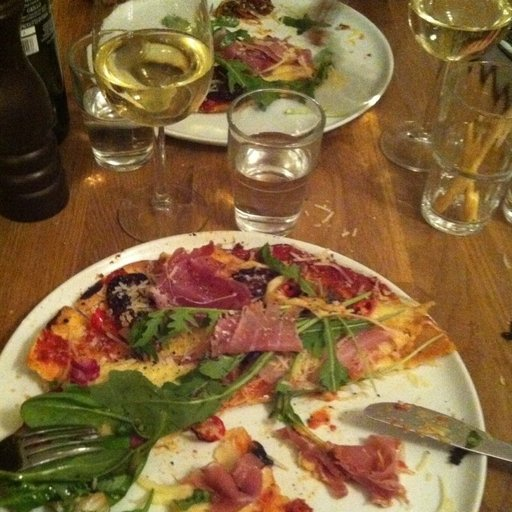

In [6]:
import random
from PIL import Image

# Set seed
random.seed()

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image from class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem # parent folder, stem is the end folder
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# Print metadata
print(f"random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

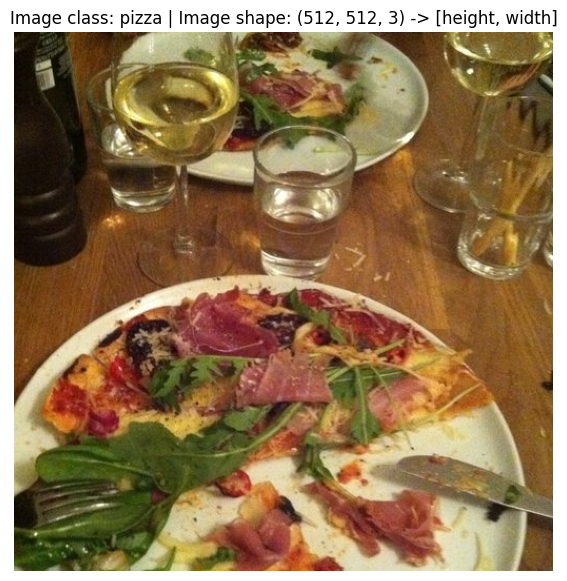

In [7]:
# Try to visualize with matplolib

import numpy as np
import matplotlib.pyplot as plt

# Turn the image into numpy array
img_as_array = np.asarray(img)

# Turn the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width]" )
plt.axis(False)

# 3. Transforming data
Before we can use our image data with PyTorch:
1. Turn your target data into tensor (in our case, numerical representation of our image)
2. Turn it into a 'torch.utils.data.Dataset' and subsequently a 'torch.utils.data.Dataloader',
 we'll call these 'Dataset' and 'DataLoader'.


In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3. Transforming data with torchvision.transfoms

In [9]:
# write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64x64 
    transforms.Resize(size= (64,64)),
    # Flip the images ramdomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.
    transforms.ToTensor()   
])

In [10]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [11]:
data_transform(img).dtype

torch.float32

In [12]:
data_transform(img)

tensor([[[0.1294, 0.1176, 0.1176,  ..., 0.4824, 0.6196, 0.5725],
         [0.1373, 0.1098, 0.1059,  ..., 0.4588, 0.5569, 0.6941],
         [0.1059, 0.0824, 0.1373,  ..., 0.4941, 0.6157, 0.6314],
         ...,
         [0.1725, 0.1725, 0.1725,  ..., 0.4706, 0.4471, 0.4157],
         [0.2196, 0.2196, 0.2039,  ..., 0.4549, 0.4392, 0.4157],
         [0.3373, 0.2118, 0.1647,  ..., 0.4235, 0.4157, 0.4078]],

        [[0.0941, 0.0863, 0.0902,  ..., 0.3922, 0.5765, 0.5373],
         [0.1059, 0.0784, 0.0863,  ..., 0.3686, 0.5059, 0.6627],
         [0.0784, 0.0549, 0.1137,  ..., 0.4157, 0.5608, 0.6000],
         ...,
         [0.1843, 0.2235, 0.2510,  ..., 0.3333, 0.3137, 0.2863],
         [0.2667, 0.2863, 0.2941,  ..., 0.3216, 0.3059, 0.2784],
         [0.3804, 0.2549, 0.2471,  ..., 0.2941, 0.2863, 0.2863]],

        [[0.0353, 0.0314, 0.0353,  ..., 0.1569, 0.2784, 0.2431],
         [0.0431, 0.0314, 0.0353,  ..., 0.1529, 0.2510, 0.3608],
         [0.0392, 0.0196, 0.0549,  ..., 0.2078, 0.2941, 0.

# 3.1 Tramsforming data with torchvision.transforms
Transforms help you get your images ready to be used with a model/perform data augmentation-
https://pytorch.org/vision/stable/transforms.html

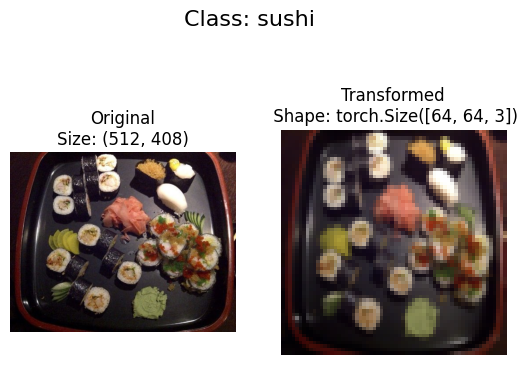

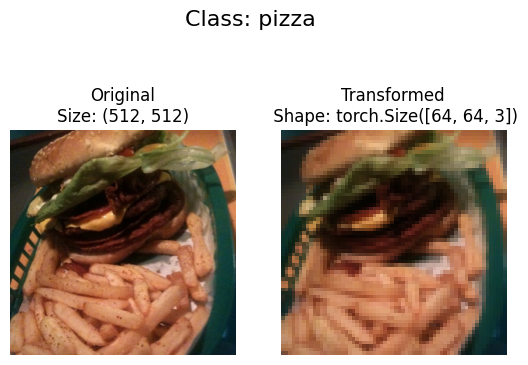

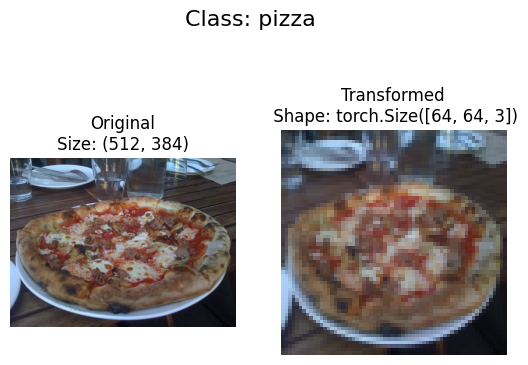

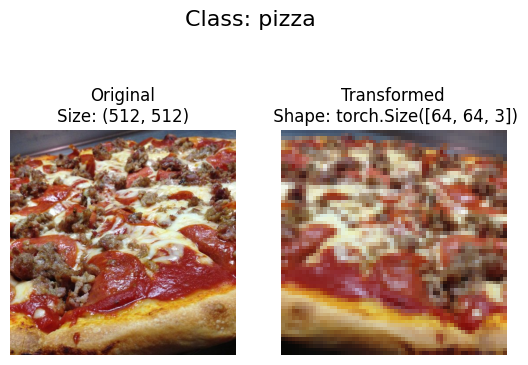

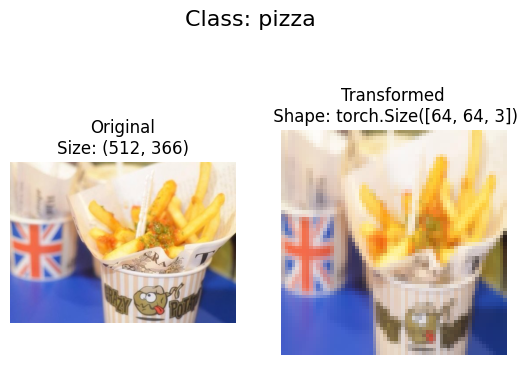

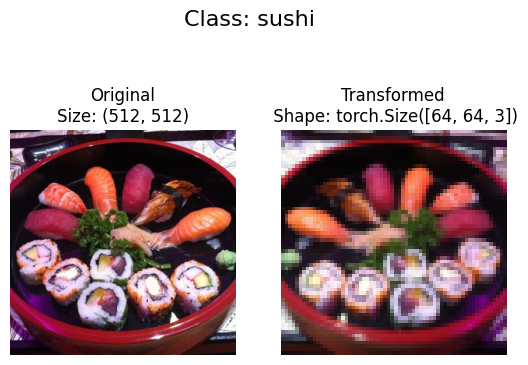

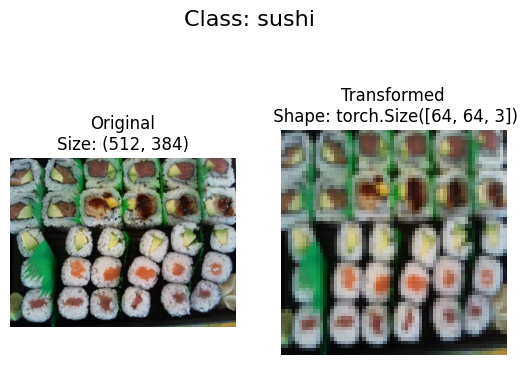

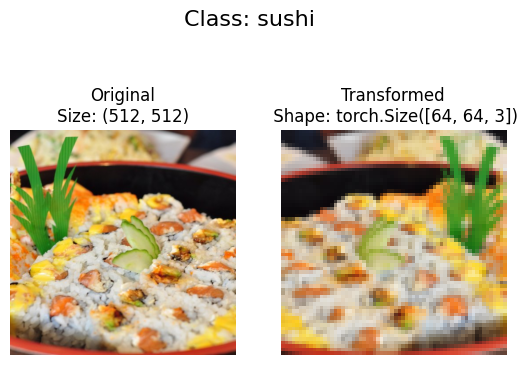

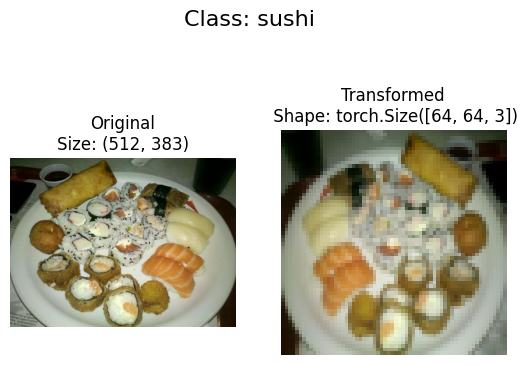

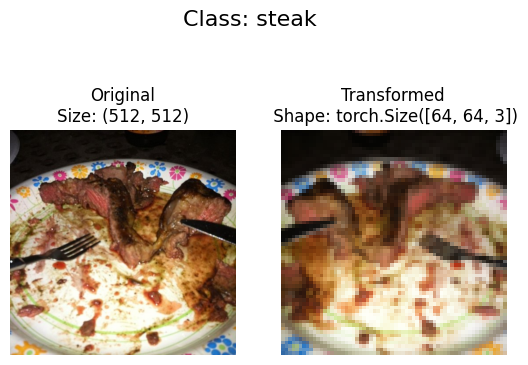

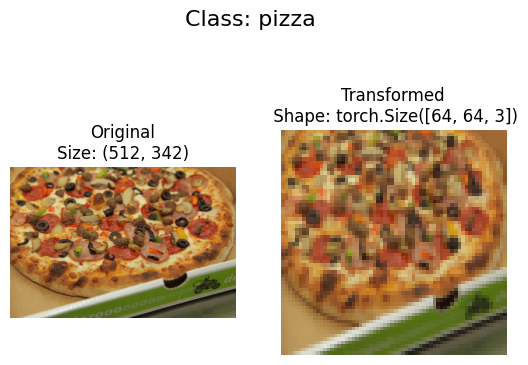

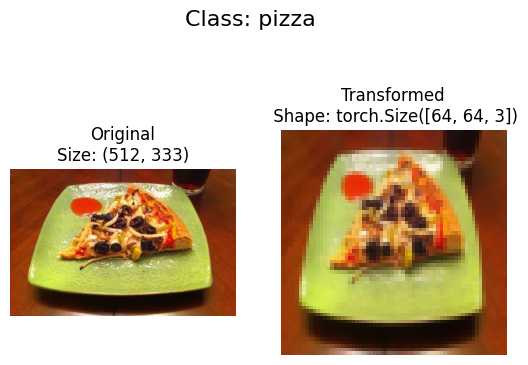

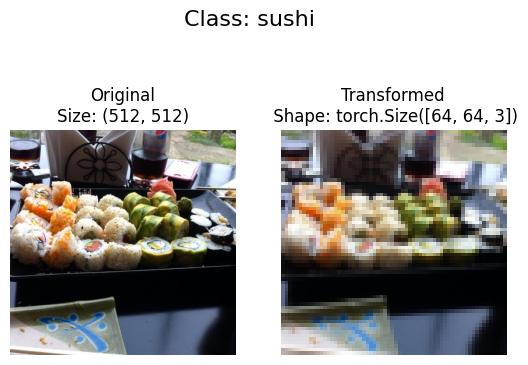

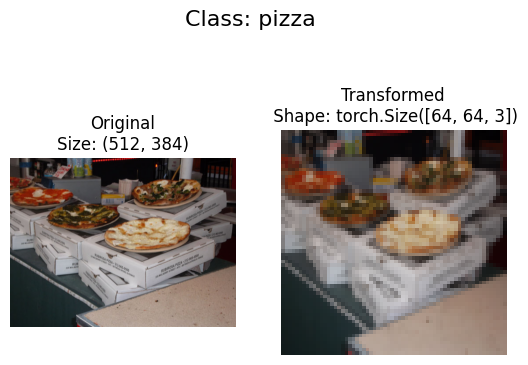

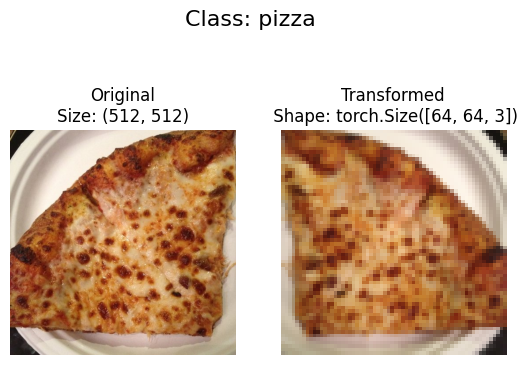

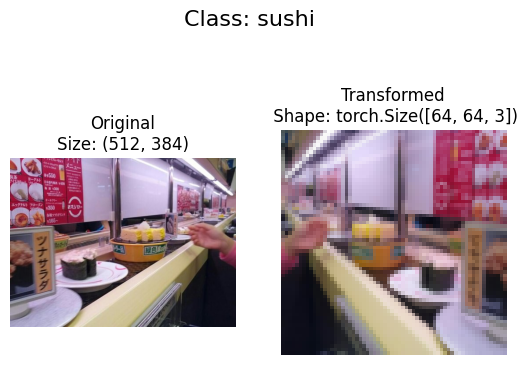

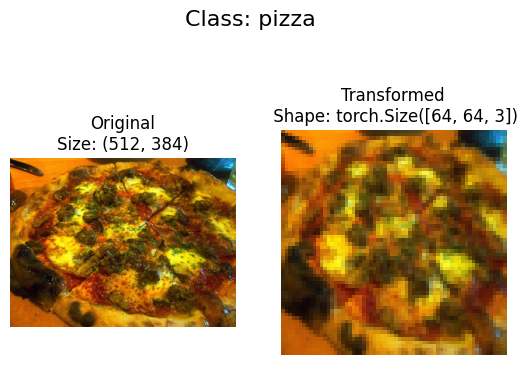

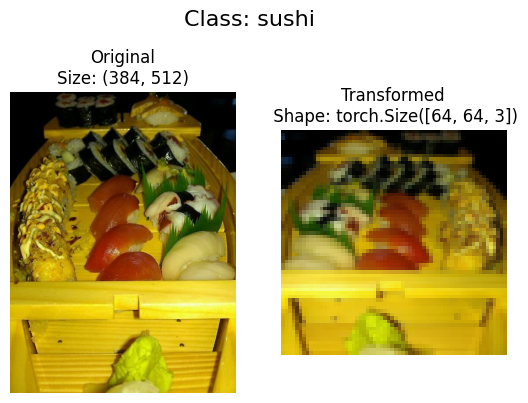

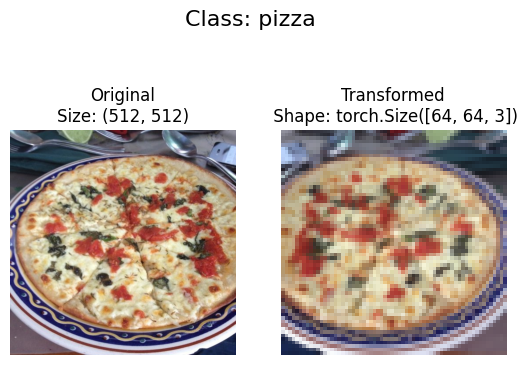

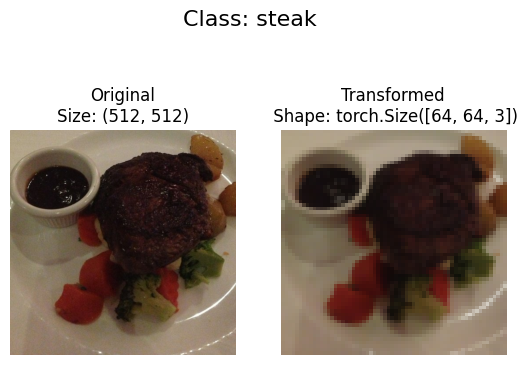

In [13]:
def plot_transformed_images(image_path: list, transform, n= 3, seed= None ): #n: is number of sample
    """
      Select random images from a path of images and loads/transforms
      them then plots the original vs the transfomed version.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_path, k= n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nSize: {f.size}')
            ax[0].axis(False)

            # Transform and plot target images
            transformed_image = transform(f).permute(1,2,0) # note we will need to change shape for matplotlib
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\n Shape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_path_list, data_transform, n= 20, seed= 42 )

# 4. loading image data using 'ImageFolder'

In [14]:
# use ImageFolder to create the datasets(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform= data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform= data_transform,
                                  target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
len(train_data), len(test_data)

(225, 75)

In [17]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [18]:
train_data[0][0]

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [19]:
# Indexing to get single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: \n {img.shape}")
print(f"Image dtype: \n {img.dtype}")
print(f"Image class: \n {label}")
print(f"Image class name: \n {class_names[label]}")
print(f"Image class name: \n {type(label)}")

Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width , color_channels]


Text(0.5, 1.0, 'pizza')

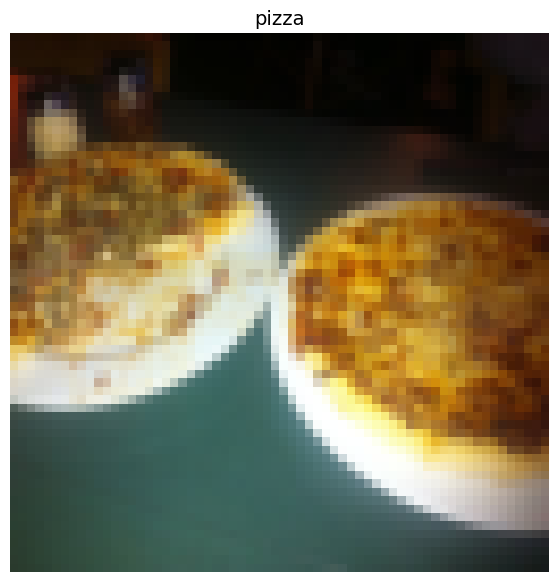

In [20]:
 # Rearrange the  order dimension 
img_permute = img.permute(1,2,0)

# Print out the  different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width , color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

# Turn loaded images into DataLoader's

A dataloader is going to help us turn our Dataset's into iterable and we can customise the batch_size
so our model can see batch_size images at time.


In [21]:
import os
os.cpu_count()

20

In [22]:
# turn train and test datasets into DataLoader's

from torch.utils.data import DataLoader
BATCH_SIZE =32
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(), 
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1756f0f72e0>,
 <torch.utils.data.dataloader.DataLoader at 0x1756d7bfb80>)

In [23]:
len(train_data), len(test_data)

(225, 75)

In [24]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [25]:
img, label = next(iter(train_dataloader))

# Batch size will now 1, you can cahnge batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape} -> [batch_size of label]")


Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32]) -> [batch_size of label]


In [26]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

## 5. Option 2: Loading Image data with a custom 'Dataset'

1. Want to load images from the file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset


Pros:
* Can create a 'Dataset' out of almost anything
* Not limited to PyTorch pre-bulit 'Dataset' functions

Cons:
* even though you could create 'Dataset' out of almost anything, it doesn't mean it will work.....
* Using a custom 'Datset' often results in us writing more code, which could be prone to errors or performance issues

In [136]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [137]:
# Instance of torchvision.datasets.imageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1. Creating a helper function to get class names

We want a function to:
1. Get the class names using os.scandir() to traverse a target directory 
(ideally the directory is in standard image classifiction format).
2. raise an error if the class names aren't found
(if this happens, there might be something wrong with dircetcory structure).
3. Turn the class names into a dict and a list and return them

In [138]:
pwd

'C:\\Users\\Nihar\\Desktop\\Deep-Learning\\Pytorch'

In [139]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found
                            

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [140]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [141]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder name in a target directory."""
    # 1. Get the class names by scanning the target directory
    classes =  sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure")

    # 3. Create a directory of index labels (computer prefer numbers rather than strings as labels)
    class_to_idx = {class_name: i for i,class_name in enumerate(classes) }
    return classes, class_to_idx 

In [142]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [143]:
for i in os.scandir(target_directory):
    print(i)

<DirEntry 'pizza'>
<DirEntry 'steak'>
<DirEntry 'sushi'>


In [144]:
sorted(entry.name for entry in os.scandir(target_directory) if entry.is_dir())

['pizza', 'steak', 'sushi']

### 5.2 Create a custom 'Dataset' to replicate 'ImageFolder'

1. Subclass torch.utils.data.dataset
2. Init our subclass with a target directory (the directory we'd like to get data from)
   as well as a transform if we'd like to transform our data.
3. Create several attribute:
   * paths- paths of our images
   * transform - the transform we'd like to use
   * clases - a list of target classes
   * class_to_idx- a dict of target classes mapped to integer labels
4. Create a function to load_images(), this function will open an images
5. Overwritte the __len()__ method to return the length of our dataset
6. Overwritte the __getitem()__ method to return a given sample when passed an index


In [145]:
# 0. write a custom dataset class
from torch.utils.data import Dataset
from PIL import Image


# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Intialize our custom dataset
    def __init__(self,
                 targ_dir: str,
                 transform= None):
        # Create class attributes
        # get all of the image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Create a function to load images
    def load_image(self, index: int) -> Image.Image :
        """Opens an image via a path and return it."""
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # 5. Overwrite __len__()
    def __len__(self) -> int:
        """Returns the total number of sample."""
        return len(self.paths)
        
    # 6. Overwritte __getitem__() method to return a paticular samples
    def __getitem__(self, index: int) -> Tuple[torch.tensor, int]:
        """Returns one sample of data, data and label (X, y)."""
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # expect path in format: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X,y)
        else:
            return img, class_idx # return data, label (X,y)
            
    

In [146]:

from torchvision import datasets, transforms
# write a transform for image
train_transform = transforms.Compose([
    # Resize our images to 64x64 
    transforms.Resize(size= (64,64)),
    # Flip the images ramdomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.
    transforms.ToTensor()])

test_transform = transforms.Compose([
    # Resize our images to 64x64 
    transforms.Resize(size= (64,64)),
    transforms.ToTensor()])

In [147]:
# Test out ImageFolderCustom

train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transform)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transform)

In [148]:
train_data_custom, test_data_custom 

(<__main__.ImageFolderCustom at 0x175735a2f10>,
 <__main__.ImageFolderCustom at 0x175735a22b0>)

In [149]:
len(train_data), len(test_data)

(225, 75)

In [150]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [151]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [152]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [153]:
# check the equality between origninal ImageFolder dataset and ImageFolderCustomDataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### 5.3 create a functrion to display random images

1. Take in a 'Dataset' and a number of other parameters such as class names and how many images to visulize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib (HWC)
                      

In [154]:
# 1. create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n : int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    # 2. Adjust display if n is too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    # 3. Set the seed
    if seed:
        random.seed(seed)

    # 4. Get some random sample
    random_sample_idx = random.sample(range(len(dataset)), k = n)

    # 5. Setup a matplotlib plot
    plt.figure(figsize=(16, 8))

    # 6. loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_sample_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust tensor dimenions for plotting
        targ_image_adjust = targ_image.permute(1,2,0) #[color_channels, height, width] -> [height, width, color_channels]

        # Plot adjuste samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title += f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)
        

    

    
        

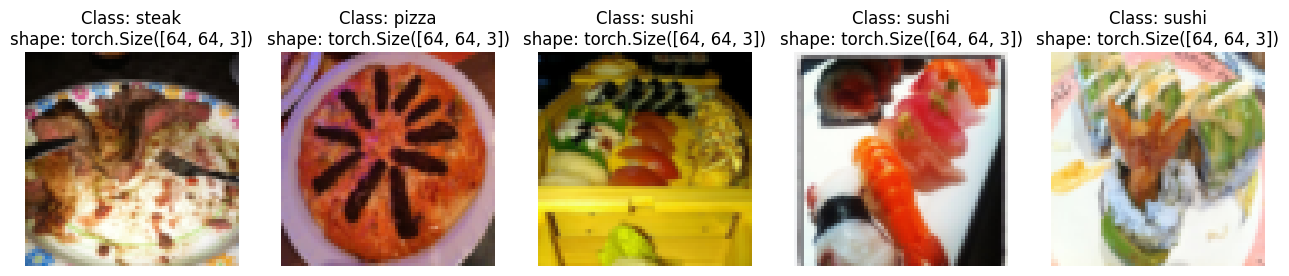

In [155]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes = class_names,
                      seed=None)

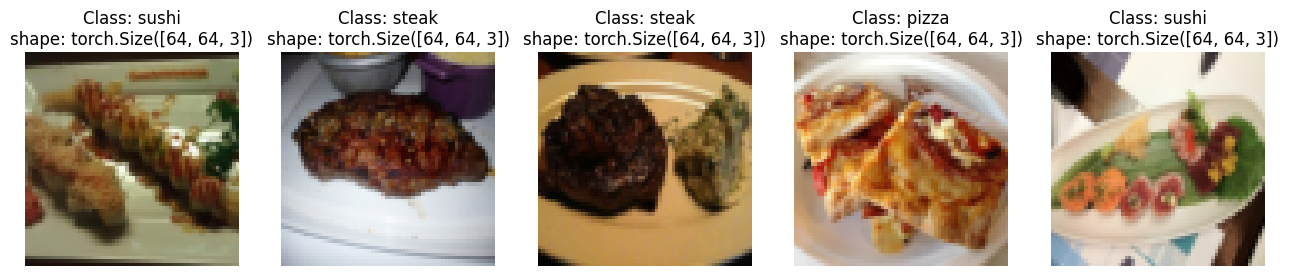

In [156]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data_custom,
                      n=5,
                      classes = class_names,
                      seed=None)

In [157]:
# 5.4 Turn custom loaded images into DataLoader's

from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE, num_workers=21,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=BATCH_SIZE, num_workers=2,
                                     shuffle=False)

C:\Users\Nihar\anaconda3\envs\tf\lib\site-packages\torch\utils\data\dataloader.py:558: UserWarning: This DataLoader will create 21 worker processes in total. Our suggested max number of worker in current system is 20 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [158]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shape
img_custom.shape, label_custom.shape

RuntimeError: DataLoader worker (pid(s) 24564, 22600, 33216, 4016, 6200, 5432, 14880, 11776, 22452, 26452, 25200, 31348, 18684, 5028, 32872, 13048, 13004, 33140, 32044, 5636, 6020) exited unexpectedly

In [ ]:
os.cpu_count()

In [100]:
for i,j  in train_dataloader_custom:
    print(i, j)

RuntimeError: DataLoader worker (pid(s) 7280, 4604, 28124, 26608, 28496, 6392, 26776, 16280, 21176, 14784, 12348, 17580, 2672, 16724, 4696, 26012, 9996, 27420, 9576) exited unexpectedly

In [103]:
a = list((7280, 4604, 28124, 26608, 28496, 6392, 26776, 16280, 21176, 14784, 12348, 17580, 2672, 16724, 4696, 26012, 9996, 27420, 9576))
len(a)

19

In [105]:
os.system("taskset -p 0xffffffffffffffff %d" % os.getpid())

1

In [111]:
--upscale_factor --cuda

NameError: name 'upscale_factor' is not defined

In [127]:
if __name__ == '__main__':
    torch.manual_seed(0)
    for i in range(0,20):
        try:
            data_loader = DataLoader(train_data_custom, batch_size=4, num_workers=i)
            print(i)
 

SyntaxError: unexpected EOF while parsing (2899526339.py, line 7)

In [128]:
if __name__ == '__main__':
    torch.manual_seed(0)
    # Replace with your dataset instance

    for i in range(0, 20):
        try:
            # Initialize DataLoader with the current number of workers
            data_loader = DataLoader(train_data_custom, batch_size=4, num_workers=i)
            print(f"Testing num_workers = {i}")

            # Test by iterating through a few batches
            for batch in data_loader:
                print(batch)
                break  # Just to quickly test the loading process

        except Exception as e:
            print(f"An error occurred with num_workers = {i}: {e}")

Testing num_workers = 0
[tensor([[[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902

In [131]:
import torch
import multiprocessing

if __name__ == '__main__':
    #multiprocessing.set_start_method('spawn')
    # Your data loading code here

    torch.manual_seed(0)
    # Replace with your dataset instance

    for i in range(0, 20):
        try:
            # Initialize DataLoader with the current number of workers
            data_loader = DataLoader(train_data_custom, batch_size=4, num_workers=i)
            print(f"Testing num_workers = {i}")

            # Test by iterating through a few batches
            for batch in data_loader:
                print(batch)
                break  # Just to quickly test the loading process

        except Exception as e:
            print(f"An error occurred with num_workers = {i}: {e}")

Testing num_workers = 0
[tensor([[[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902

KeyboardInterrupt: 

In [135]:
i, j  = next(iter(train_dataloader))
i.shape
             

torch.Size([32, 3, 64, 64])